In [3]:
# Mount Google Drive to save work
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install nltk spacy gensim datasets transformers

# Download NLP resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import spacy
spacy.cli.download("en_core_web_sm")

# Verify GPU availability
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
GPU available: []


# **Task 1: Data Preprocessing and Word Embeddings**

In [3]:
!pip install --upgrade nltk

import nltk

# Manually set the data path for NLTK
import os
nltk_data_path = "/usr/local/nltk_data"
os.makedirs(nltk_data_path, exist_ok=True)
nltk.data.path.append(nltk_data_path)

# Download necessary resources
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path) # Download punkt_tab to the specified path

# Verify that NLTK is using the correct path
print("NLTK data path:", nltk.data.path)

NLTK data path: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/usr/local/nltk_data', '/usr/local/nltk_data']


[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/local/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/local/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/local/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/local/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


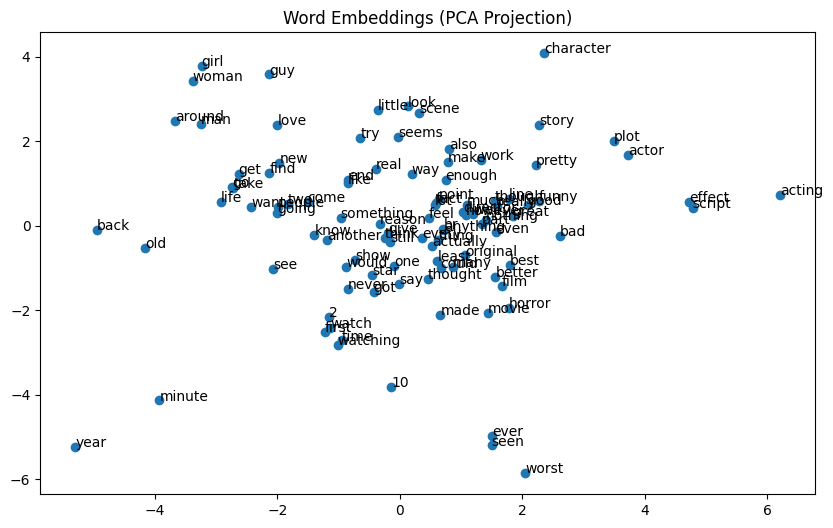

In [4]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the IMDb dataset
dataset = load_dataset("imdb")
train_data = dataset['train']
test_data = dataset['test']

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Stopword removal
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]  # Lemmatization
    return tokens

# Apply preprocessing
train_data = [(preprocess_text(text), label) for text, label in zip(train_data['text'][:5000], train_data['label'][:5000])]  # Use a subset to speed up
test_data = [(preprocess_text(text), label) for text, label in zip(test_data['text'][:1000], test_data['label'][:1000])]

# Train Word2Vec embeddings
word2vec_model = Word2Vec([tokens for tokens, _ in train_data], vector_size=100, window=5, min_count=5, workers=4)

# Visualizing embeddings using PCA
words = list(word2vec_model.wv.index_to_key)[:100]
word_vectors = np.array([word2vec_model.wv[word] for word in words])
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))
plt.title("Word Embeddings (PCA Projection)")
plt.show()


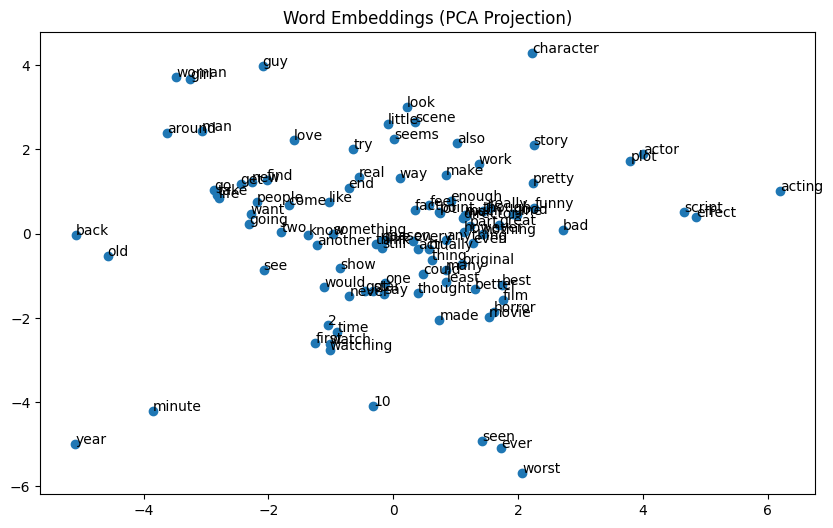

In [5]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the IMDb dataset
dataset = load_dataset("imdb")
train_data = dataset['train']
test_data = dataset['test']

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Stopword removal
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]  # Lemmatization
    return tokens

# Apply preprocessing
train_data = [(preprocess_text(text), label) for text, label in zip(train_data['text'][:5000], train_data['label'][:5000])]  # Use a subset to speed up
test_data = [(preprocess_text(text), label) for text, label in zip(test_data['text'][:1000], test_data['label'][:1000])]

# Train Word2Vec embeddings
word2vec_model = Word2Vec([tokens for tokens, _ in train_data], vector_size=100, window=5, min_count=5, workers=4)

# Visualizing embeddings using PCA
words = list(word2vec_model.wv.index_to_key)[:100]
word_vectors = np.array([word2vec_model.wv[word] for word in words])
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))
plt.title("Word Embeddings (PCA Projection)")
plt.show()


In [6]:
import gensim.downloader as api

# Load pre-trained GloVe embeddings (small model for speed)
glove_model = api.load("glove-wiki-gigaword-100")  # 100D vectors
print("GloVe model loaded!")


[==================================================] 100.0% 128.1/128.1MB downloaded
GloVe model loaded!


In [7]:
from gensim.models import FastText

# Train FastText model on our dataset
fasttext_model = FastText([tokens for tokens, _ in train_data], vector_size=100, window=5, min_count=5, workers=4)
print("FastText model trained!")


FastText model trained!


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Select a word to compare
word = "trust"

# Get vectors for the word from each model
vec_word2vec = word2vec_model.wv[word]
vec_glove = glove_model[word]
vec_fasttext = fasttext_model.wv[word]

# Compute cosine similarity between embeddings
similarity_matrix = cosine_similarity([vec_word2vec, vec_glove, vec_fasttext])

# Print similarity scores
print("Cosine Similarity between Word2Vec, GloVe, and FastText embeddings for '{}':".format(word))
print("Word2Vec ↔ GloVe:", similarity_matrix[0][1])
print("Word2Vec ↔ FastText:", similarity_matrix[0][2])
print("GloVe ↔ FastText:", similarity_matrix[1][2])


Cosine Similarity between Word2Vec, GloVe, and FastText embeddings for 'trust':
Word2Vec ↔ GloVe: -0.028851733
Word2Vec ↔ FastText: 0.15703914
GloVe ↔ FastText: 0.12437935


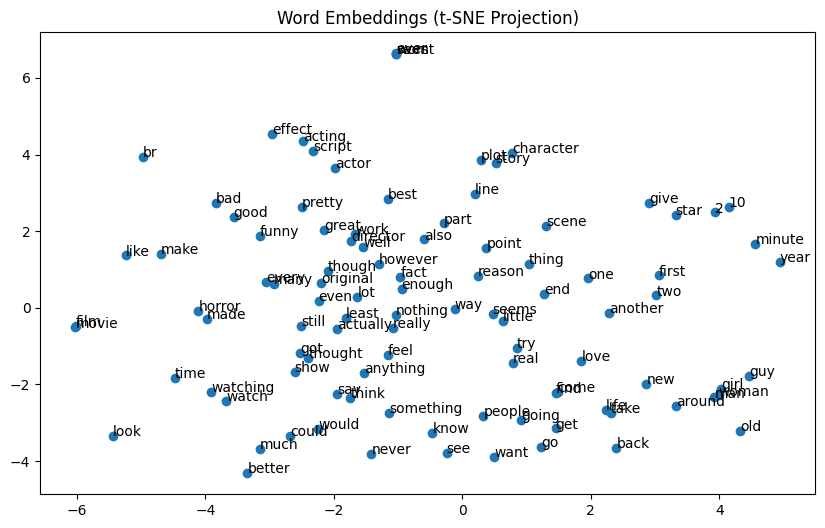

In [15]:
from sklearn.manifold import TSNE

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='o')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))
plt.title("Word Embeddings (t-SNE Projection)")
plt.show()


# **Building Recurrent Neural Networks for Sentiment Analysis**

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.9323 - loss: 0.2735 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


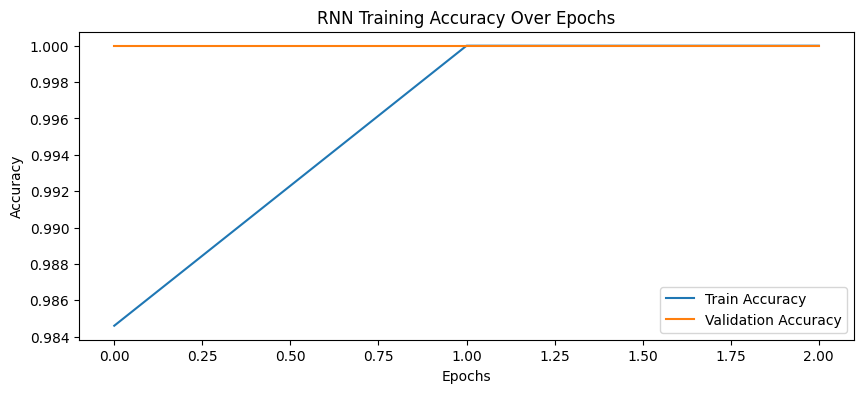

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Tokenize the dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text for text, label in train_data])

# Convert text to sequences
X_train = tokenizer.texts_to_sequences([text for text, label in train_data])
X_test = tokenizer.texts_to_sequences([text for text, label in test_data])

# Padding sequences to make all inputs the same length
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Convert labels to numpy arrays
y_train = np.array([label for text, label in train_data])
y_test = np.array([label for text, label in test_data])
                                                        A
# Define the RNN model
model_rnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    SimpleRNN(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

# Plot training results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("RNN Training Accuracy Over Epochs")
plt.show()


# **Implementing LSTM and GRU for Text Classification**


Training LSTM Model...

Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.9990 - loss: 0.2636 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Training GRU Model...

Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.9424 - loss: 0.3480 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


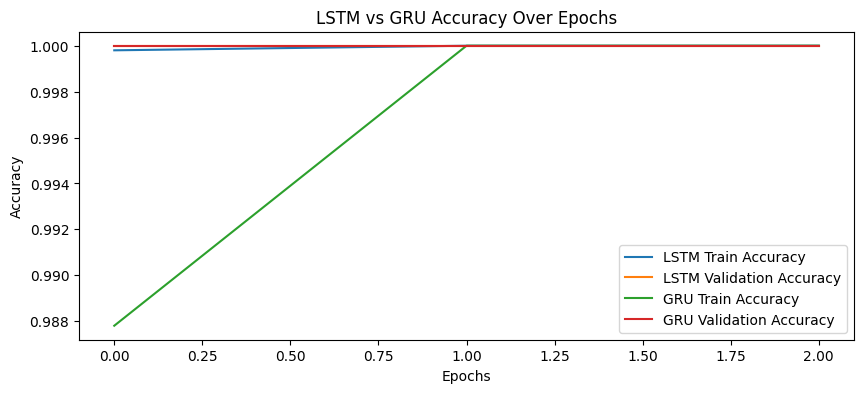

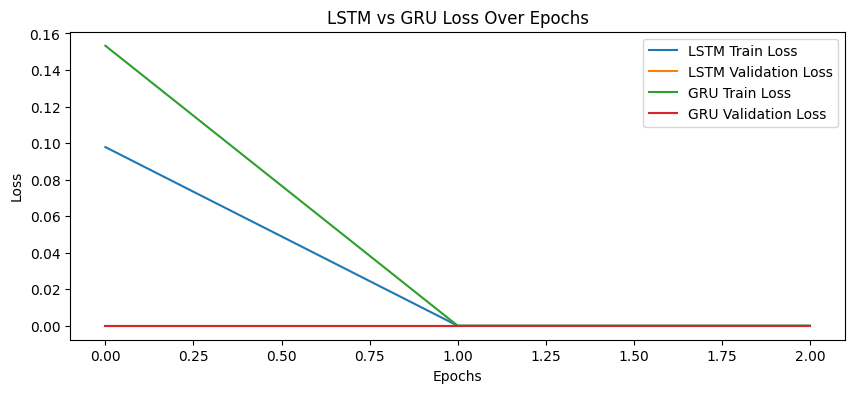

In [11]:
from tensorflow.keras.layers import LSTM, GRU

# Define LSTM Model
model_lstm = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    LSTM(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Define GRU Model
model_gru = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    GRU(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile both models
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM
print("\nTraining LSTM Model...\n")
history_lstm = model_lstm.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

# Train GRU
print("\nTraining GRU Model...\n")
history_gru = model_gru.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

# Plot LSTM vs GRU Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("LSTM vs GRU Accuracy Over Epochs")
plt.show()

# Plot LSTM vs GRU Loss
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("LSTM vs GRU Loss Over Epochs")
plt.show()


# **Text Generation with LSTM**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Sample text data (Shakespearean text)
text_data = """Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer’s lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;"""

# Tokenization and sequence preparation
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
total_words = len(tokenizer.word_index) + 1
input_sequences = []
for line in text_data.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

# Padding sequences
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Define the LSTM model
model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_length-1),
    LSTM(150, return_sequences=True),
    LSTM(150),
    Dense(total_words, activation='softmax')
])

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=50, verbose=1)

# Function to generate text
def generate_text(seed_text, next_words=20):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = tokenizer.index_word.get(predicted[0], "")
        seed_text += " " + output_word
    return seed_text

# Generate text using a seed sentence
seed_sentences = [
    "Shall I compare thee",
    "To be or not to be",
    "Once upon a midnight dreary"
]

# Generate and print text for each seed
for seed in seed_sentences:
    print(f"Seed Text: {seed}")
    print(f"Generated Text: {generate_text(seed, next_words=20)}")
    print("\n" + "="*80 + "\n")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.0263 - loss: 3.7391
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1314 - loss: 3.7307
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1314 - loss: 3.7233
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1577 - loss: 3.7145 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1314 - loss: 3.7044 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1002 - loss: 3.6924
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0685 - loss: 3.6679 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0947 - loss: 3.6335
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0526 - loss: 3.5849
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0526 - loss: 3.5448
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0685 - loss: 3.5102
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0947 - loss: 3.5046
Epoch 13/

# **Improve Performance with Bidirectional LSTM**

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Tokenization and sequence preparation
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
total_words = len(tokenizer.word_index) + 1
input_sequences = []
for line in text_data.split(" "):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Define Standard LSTM model
model_lstm = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_length-1),
    LSTM(150, return_sequences=True),
    LSTM(150),
    Dense(total_words, activation='softmax')
])

# Compile and train the model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X, y, epochs=50, verbose=1)

# Define Bidirectional LSTM model
model_bi = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_length-1),
    Bidirectional(LSTM(150, return_sequences=True)),
    Bidirectional(LSTM(150)),
    Dense(total_words, activation='softmax')
])

# Compile and train the model
model_bi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_bi = model_bi.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 3.7374
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 3.7323
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 1.0000 - loss: 3.7270
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 3.7216
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 3.7158
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 3.7097
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 3.7032
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 3.6963
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 3.6888
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 3.6806
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 3.6718
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 3.662

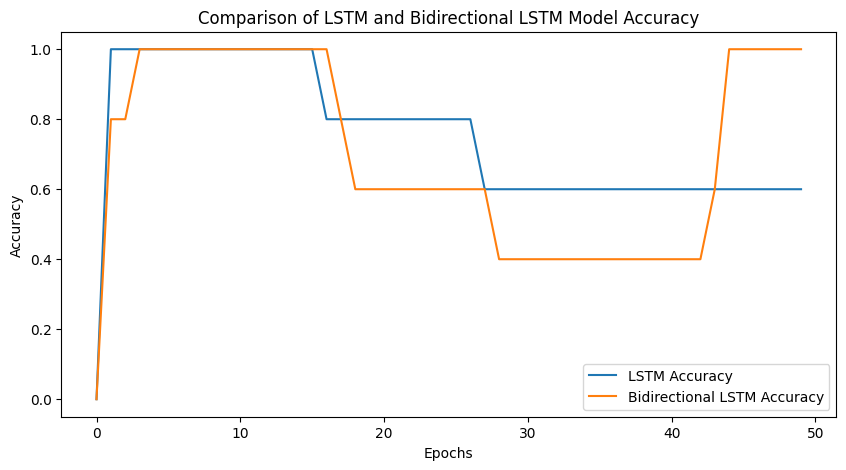

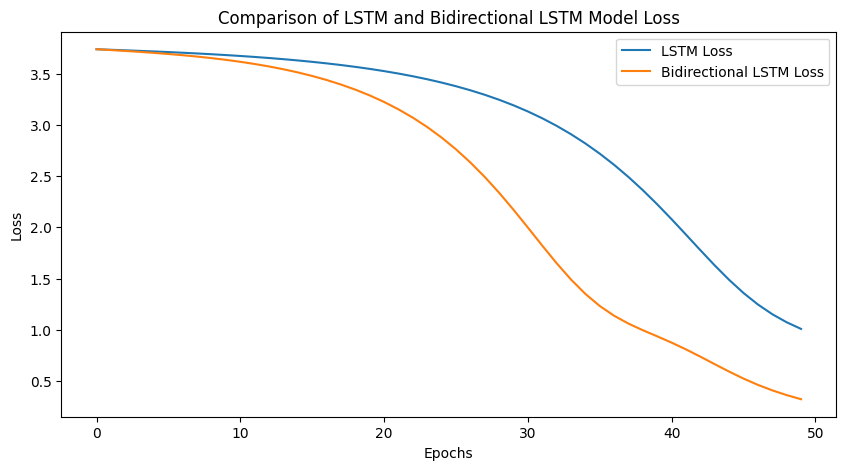

In [28]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['accuracy'], label='LSTM Accuracy')
plt.plot(history_bi.history['accuracy'], label='Bidirectional LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of LSTM and Bidirectional LSTM Model Accuracy')
plt.legend()
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.plot(history_bi.history['loss'], label='Bidirectional LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of LSTM and Bidirectional LSTM Model Loss')
plt.legend()
plt.show()
